# Objective - Analyzing Vehicle Dataset to extract meaningful insights

# Utkarsh Singh-23MB0068

## Data Loading and Preparation

### Step 1: Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [5]:
import warnings
warnings.filterwarnings("ignore")

### Step 2: Load the dataset

In [8]:
df = pd.read_excel("vehicle_dataset.xlsx")

### Step 3: Inspecting structure of the dataset

In [4]:
print(df.head())  # Display the first few rows

       uniqueid          ts        lat        lng  external_bat_voltage  \
0  it_220403501  1709340731  19.069340  78.355148                   NaN   
1  it_220403501  1709340794  19.069347  78.355141                   NaN   
2  it_220403501  1709340857  19.069414  78.355179                   NaN   
3  it_220403501  1709340920  19.069258  78.355225                   NaN   
4  it_220403501  1709340983  19.069094  78.355339                   NaN   

   internal_bat_voltage  engineload  tanklevel  throttle  coolant  ...  \
0                   NaN          28        NaN       NaN       33  ...   
1                   NaN          22        NaN       NaN       41  ...   
2                   NaN          25        NaN       NaN       48  ...   
3                   NaN          35        NaN       NaN       52  ...   
4                   NaN           0        NaN       NaN       57  ...   

   live_location  to_be_expired_at  status  event_id  \
0            NaN               NaN     NaN      

In [5]:
print(df.info())  # Display data types and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18434 entries, 0 to 18433
Columns: 141 entries, uniqueid to adblue_level
dtypes: float64(122), int64(13), object(6)
memory usage: 19.8+ MB
None


In [6]:
print(df.describe())  # Summary statistics for numerical features

                 ts           lat           lng  external_bat_voltage  \
count  1.843400e+04  18434.000000  18434.000000                   0.0   
mean   1.711641e+09     18.724254     78.865351                   NaN   
std    1.275937e+06      0.816184      3.208032                   NaN   
min    1.709341e+09      0.000000      0.000000                   NaN   
25%    1.710903e+09     18.701308     78.758909                   NaN   
50%    1.711692e+09     18.853032     79.092408                   NaN   
75%    1.712682e+09     18.921385     79.352821                   NaN   
max    1.713636e+09     19.069500     79.481804                   NaN   

       internal_bat_voltage    engineload  tanklevel  throttle       coolant  \
count                   0.0  18434.000000        0.0       0.0  18434.000000   
mean                    NaN     38.141206        NaN       NaN     84.571336   
std                     NaN     29.889358        NaN       NaN      7.718346   
min                   

In [7]:
print(df.dtypes) # Check the data types of the columns

uniqueid                          object
ts                                 int64
lat                              float64
lng                              float64
external_bat_voltage             float64
                                  ...   
boost_pressure                   float64
intake_manifold_1_temperature    float64
air_inlet_pressure               float64
exhaust_gas_temperature          float64
adblue_level                     float64
Length: 141, dtype: object


In [3]:
"""If the DataFrame df has 100 rows and 5 columns

df.shape will return (100, 5).
df.shape[0] will return 100.
df.shape[1] will return 5."""

'If the DataFrame df has 100 rows and 5 columns\n\ndf.shape will return (100, 5).\ndf.shape[0] will return 100.\ndf.shape[1] will return 5.'

In [9]:
# Determine the size of the dataset
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 18434, Number of columns: 141


### Step 4: Identify the types of variables

In [10]:
# Identifying Numerical columns: Columns with data types float64 (for continuous numbers) and int64 (for integer numbers).
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Identifying Categorical columns: Columns with data type 'object', which usually indicates string-based or categorical data.
categorical_cols = df.select_dtypes(include=['object']).columns

# Identifying Boolean columns: Columns with data type 'bool', used for True/False values.
boolean_cols = df.select_dtypes(include=['bool']).columns

In [11]:
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Boolean Columns:", boolean_cols)

Numerical Columns: Index(['ts', 'lat', 'lng', 'external_bat_voltage', 'internal_bat_voltage',
       'engineload', 'tanklevel', 'throttle', 'coolant', 'intakeairtemp',
       ...
       'live_location', 'to_be_expired_at', 'status', 'event_id',
       'particulated_trap_inlet_pressure', 'boost_pressure',
       'intake_manifold_1_temperature', 'air_inlet_pressure',
       'exhaust_gas_temperature', 'adblue_level'],
      dtype='object', length=135)
Categorical Columns: Index(['uniqueid', 'pluscode', 'can_raw_data', 'brake_switch_status',
       'clutch_switch_status', 'parking_switch_status'],
      dtype='object')
Boolean Columns: Index([], dtype='object')


### Step 5: Check for missing values and irregularities

In [12]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:", missing_values)

Missing Values: uniqueid                             0
ts                                   0
lat                                  0
lng                                  0
external_bat_voltage             18434
                                 ...  
boost_pressure                   18434
intake_manifold_1_temperature    18434
air_inlet_pressure               18434
exhaust_gas_temperature          18434
adblue_level                      3664
Length: 141, dtype: int64


In [13]:
# Identify irregularities (e.g., unexpected data types)
print("Unique Values per Column:\n", df.nunique())

Unique Values per Column:
 uniqueid                             1
ts                               18434
lat                              15917
lng                              15255
external_bat_voltage                 0
                                 ...  
boost_pressure                       0
intake_manifold_1_temperature        0
air_inlet_pressure                   0
exhaust_gas_temperature              0
adblue_level                       131
Length: 141, dtype: int64


## Data Cleaning and Preprocessing

### Step 6: Handle missing values

In [14]:
# Drop columns with all values as NaN
df.dropna(axis=1, how='all', inplace=True) 

In [15]:
# Count the number of zeros in each column
zero_counts = (df == 0).sum()

high_zero_cols = zero_counts > 100

# Calculate the percentage of zeros
zero_percentages = (zero_counts / len(df)) * 100

# Display the counts and percentages
print("Zero counts per column:\n", zero_counts)
print("\nPercentage of zeros per column:\n", zero_percentages)

Zero counts per column:
 uniqueid                                    0
ts                                          0
lat                                        30
lng                                        30
engineload                               2817
coolant                                     0
engineoiltemp                               0
vehiclespeed                             2237
rpm                                      1133
obddistance                                 0
runtime                                     0
engine_torque_percent                    2201
selected_gear                               0
current_gear                             5340
fuel_consumption                            0
fuel_level                                  0
fl_level                                    2
fuel_rate                                2733
fuel_economy                             1080
accelerator_pedal_pos                    8006
pluscode                                    0
vibration

###### Zero might represent no activity in case of sensor data,hence I have not removed it.

In [16]:
# Check the shape of updated DataFrame
print(f"Shape after dropping empty columns: {df.shape}")

Shape after dropping empty columns: (18434, 33)


In [17]:
df.head()

,uniqueid,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,...,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level
0,it_220403501,1709340731,19.069340,78.355148,28,33,1774.9688,0.00000,749.000,60780800,...,100.0,102,215,0,1,102,Released,Released,Pressed,NaN
1,it_220403501,1709340794,19.069347,78.355141,22,41,1774.9688,0.00000,1208.375,60780800,...,99.6,102,215,19,2,102,Released,Pressed,Pressed,NaN
2,it_220403501,1709340857,19.069414,78.355179,25,48,1774.9688,1.40625,752.625,60780800,...,99.6,102,215,0,1,102,Pressed,Pressed,Released,NaN
3,it_220403501,1709340920,19.069258,78.355225,35,52,1774.9688,2.81250,996.375,60780820,...,99.6,102,215,28,2,102,Released,Pressed,Released,NaN
4,it_220403501,1709340983,19.069094,78.355339,0,57,1774.9688,4.53125,1065.750,60780840,...,100.0,102,215,1,2,102,Released,Pressed,Released,NaN


In [18]:
# Fill numerical columns with the median and categorical columns with mode
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

### Step 7: Convert data types if necessary

In [19]:
df['ts'] = pd.to_datetime(df['ts'], errors='coerce')       # Converting datetime column

In [20]:
# Convert all numeric columns to the correct format
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

### Step 8: Check for duplicates

In [21]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate Records: {duplicates}")

Duplicate Records: 0


In [22]:
df.head()

,uniqueid,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,...,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level
0,it_220403501,1970-01-01 00:00:01.709340731,19.069340,78.355148,28,33,1774.9688,0.00000,749.000,60780800,...,100.0,102,215,0,1,102,Released,Released,Pressed,88.4
1,it_220403501,1970-01-01 00:00:01.709340794,19.069347,78.355141,22,41,1774.9688,0.00000,1208.375,60780800,...,99.6,102,215,19,2,102,Released,Pressed,Pressed,88.4
2,it_220403501,1970-01-01 00:00:01.709340857,19.069414,78.355179,25,48,1774.9688,1.40625,752.625,60780800,...,99.6,102,215,0,1,102,Pressed,Pressed,Released,88.4
3,it_220403501,1970-01-01 00:00:01.709340920,19.069258,78.355225,35,52,1774.9688,2.81250,996.375,60780820,...,99.6,102,215,28,2,102,Released,Pressed,Released,88.4
4,it_220403501,1970-01-01 00:00:01.709340983,19.069094,78.355339,0,57,1774.9688,4.53125,1065.750,60780840,...,100.0,102,215,1,2,102,Released,Pressed,Released,88.4


### Step 9: Handle Outliers

In [23]:
# Identify numerical columns for outlier detection
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create an empty dictionary to store outliers
outliers = {}

# Calculate IQR and identify outliers for each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25) #Q1 is the median of the lower half of the data
    Q3 = df[col].quantile(0.75) #Q3 is the median of the upper half of the data
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers (values outside the bounds)
    outliers_in_column = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    if not outliers_in_column.empty:
        outliers[col] = outliers_in_column

# Display outliers for each column (if any)
if outliers:
    for col, outlier_data in outliers.items():
        print(f"Outliers in column '{col}':")
        print("="*50)
else:
    print("No outliers detected.")


Outliers in column 'lat':
Outliers in column 'lng':
Outliers in column 'coolant':
Outliers in column 'rpm':
Outliers in column 'current_gear':
Outliers in column 'fuel_economy':
Outliers in column 'engine_throttle_valve1_pos':
Outliers in column 'adblue_level':


### Exploratory Data Analysis

### Step 10: Univariate Analysis

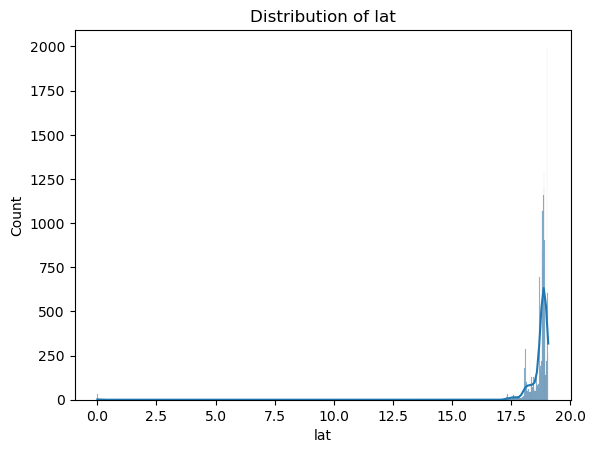

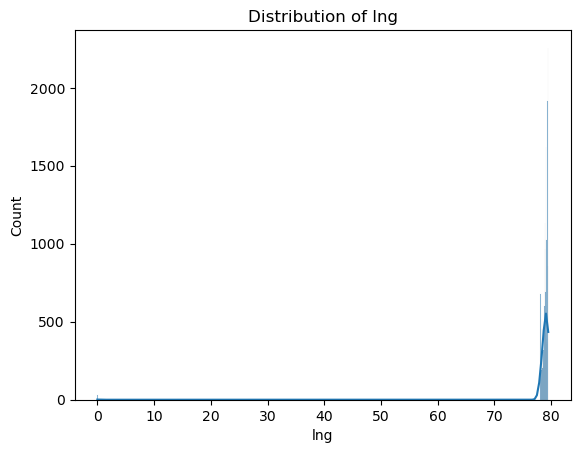

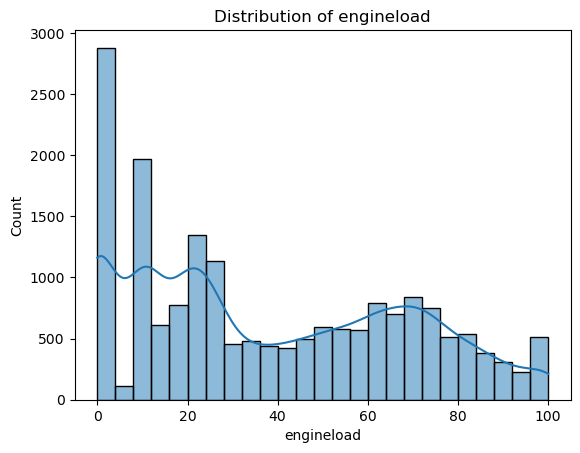

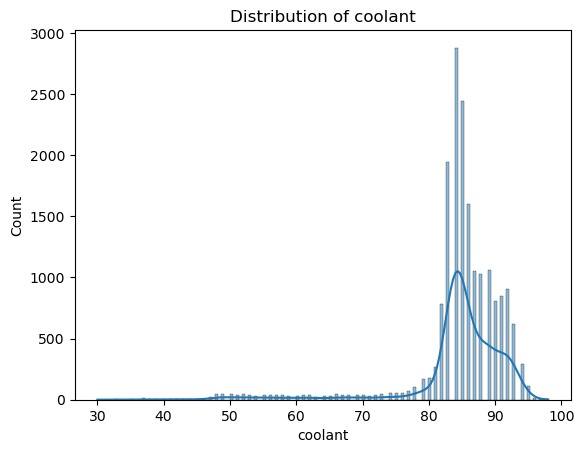

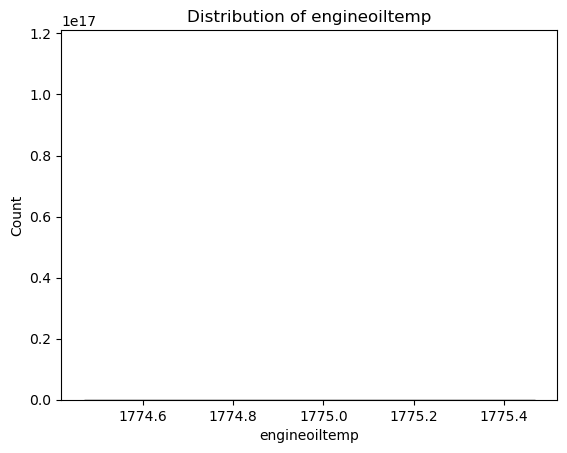

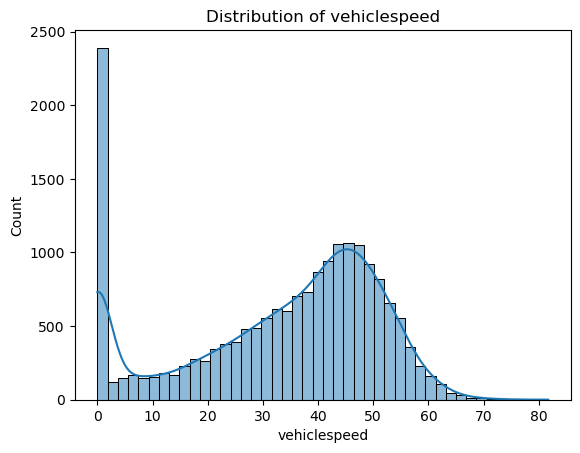

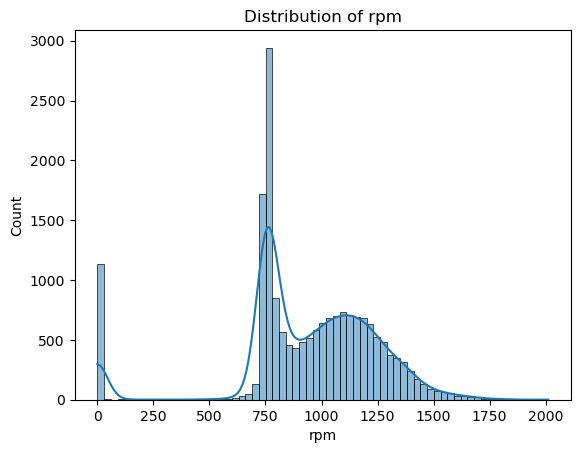

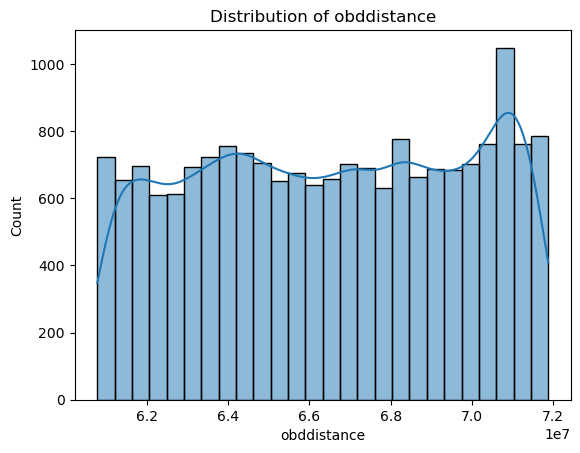

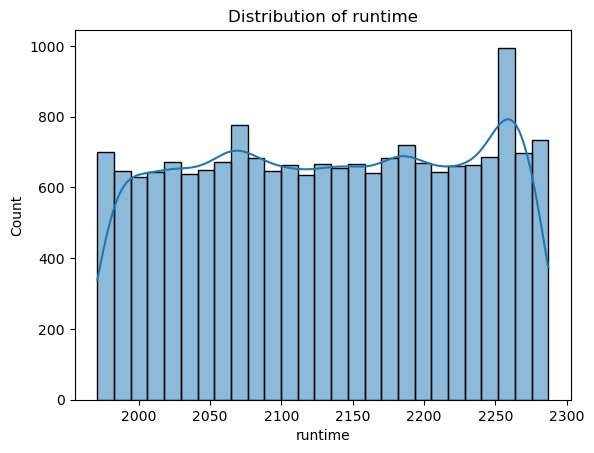

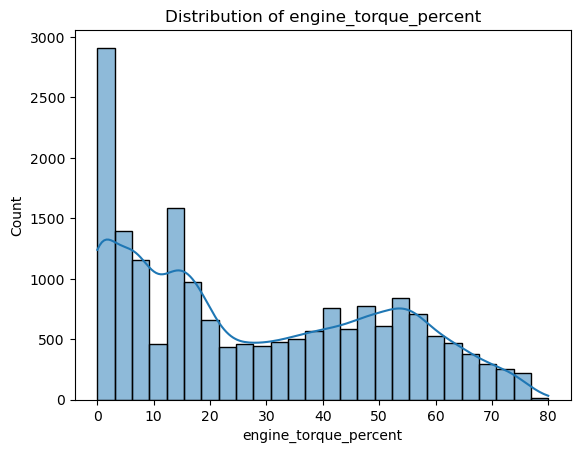

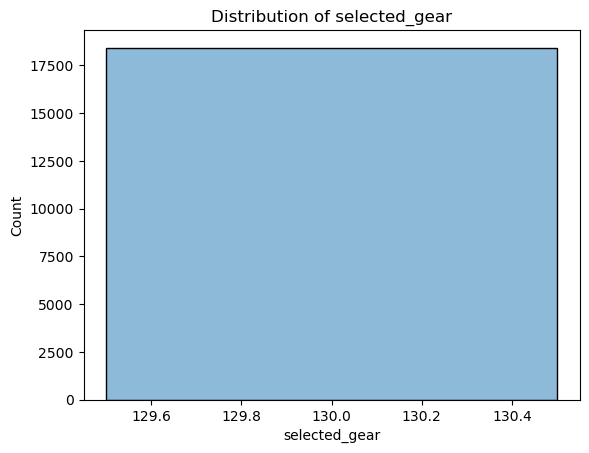

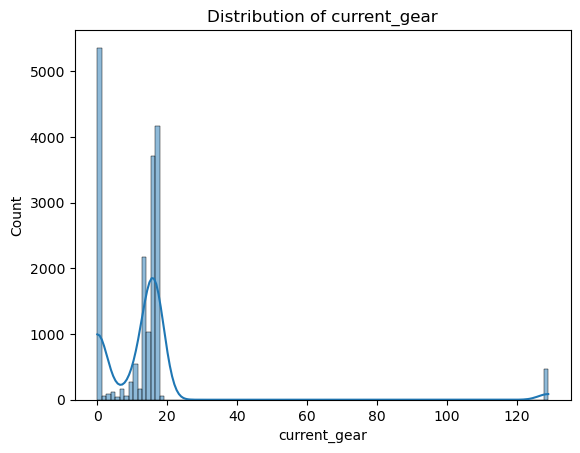

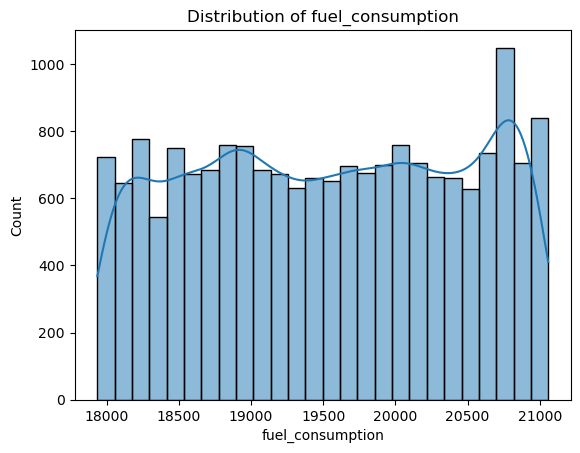

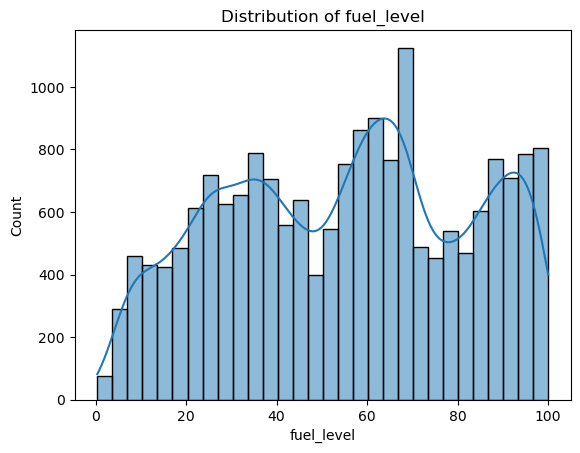

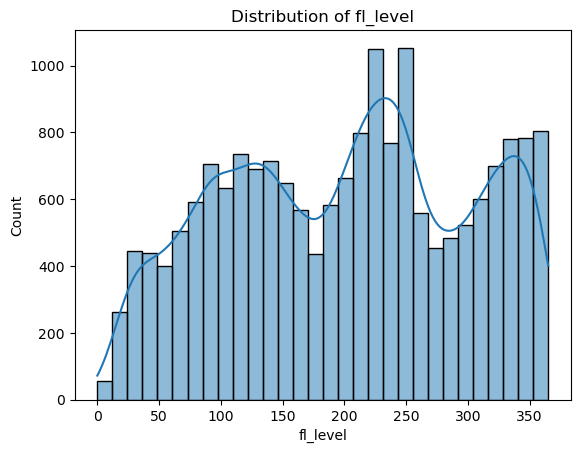

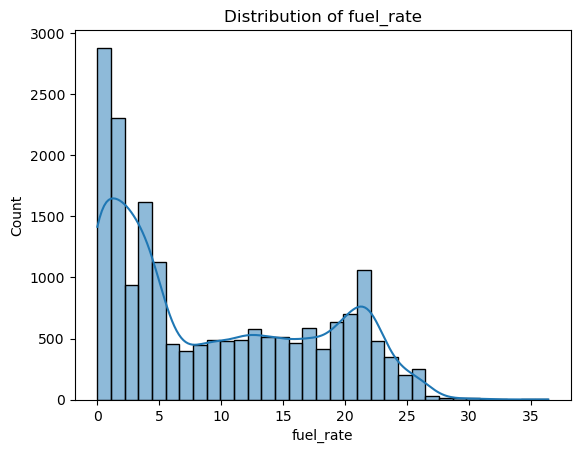

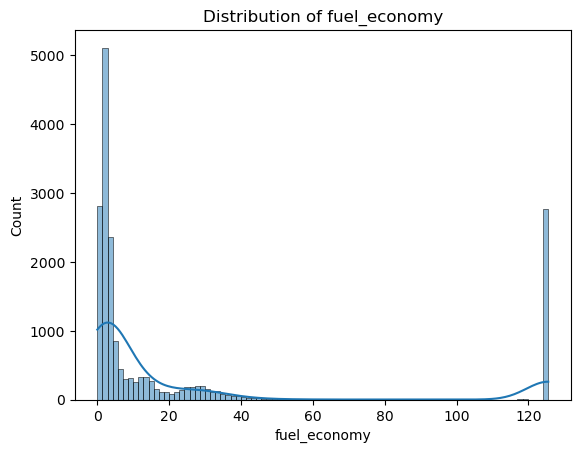

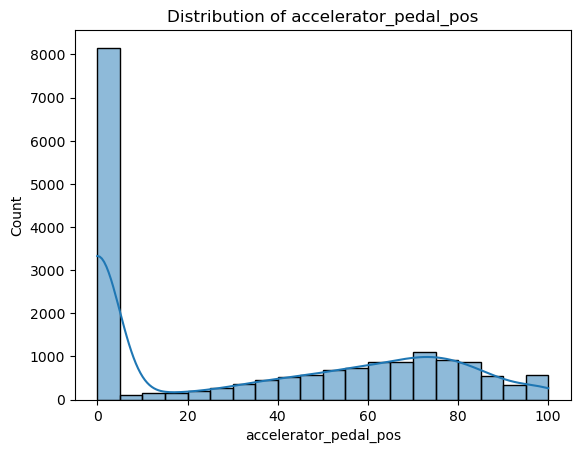

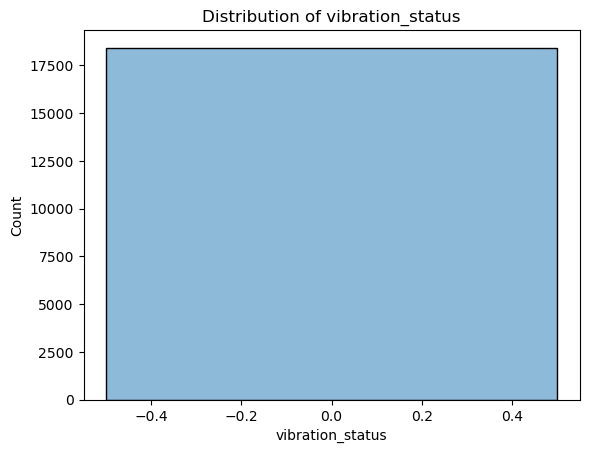

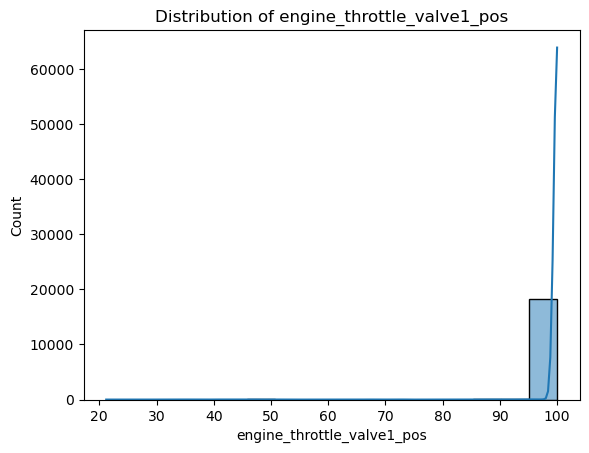

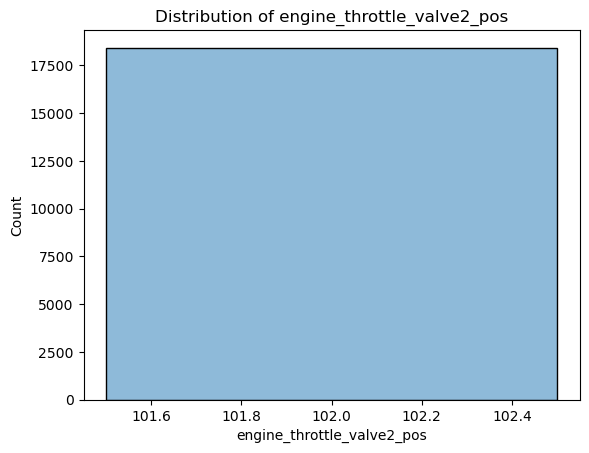

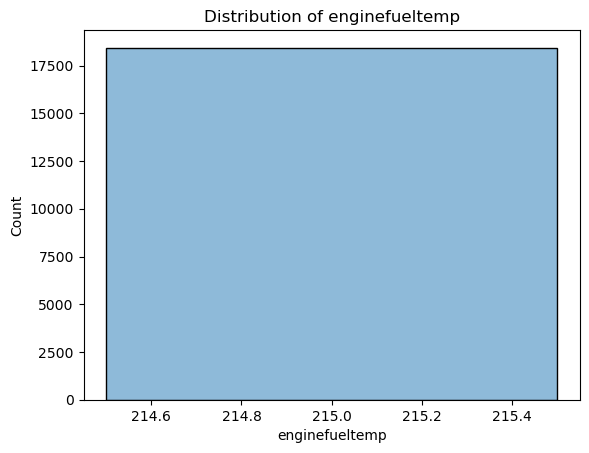

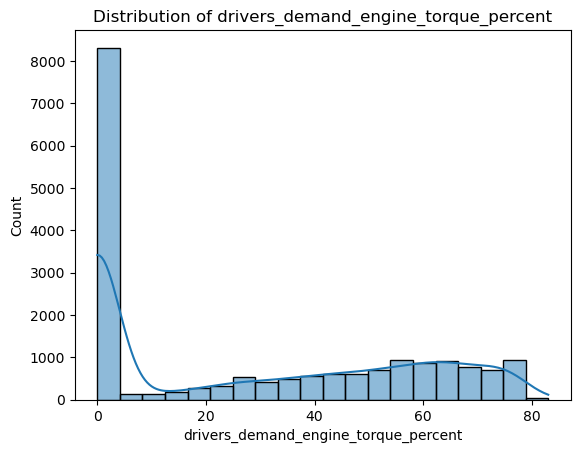

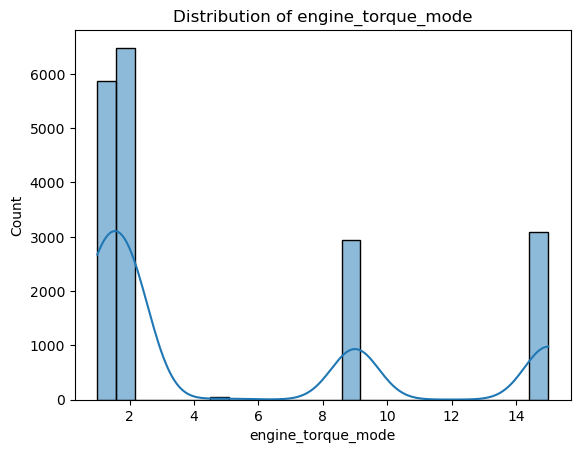

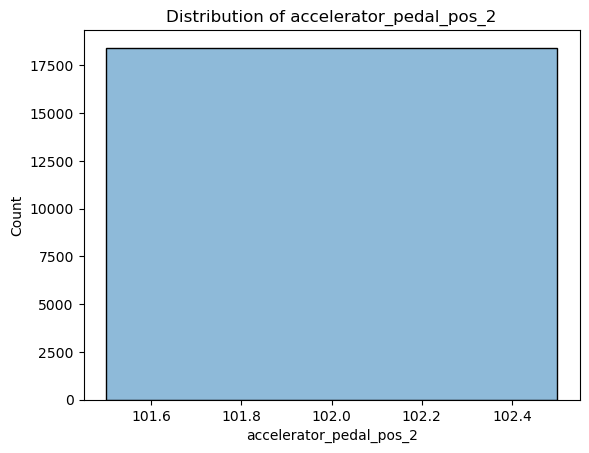

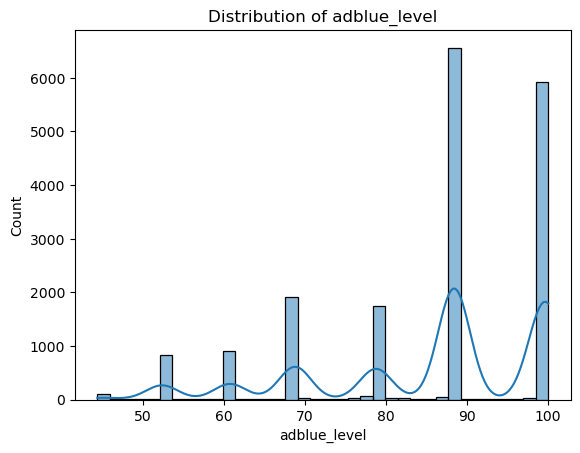

In [24]:
# Plot distributions for numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

pluscode has too many unique values (2639). Showing top 20.


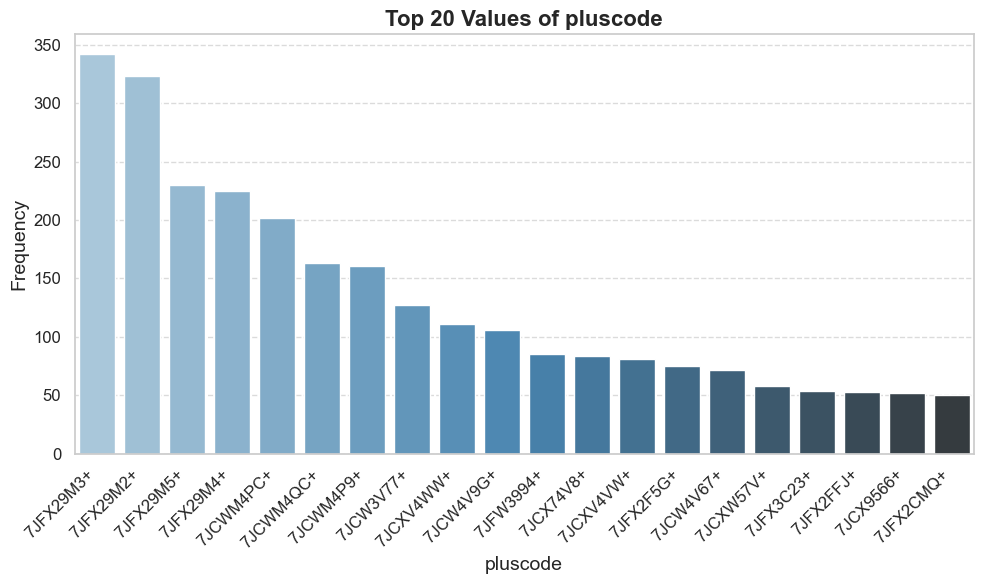

can_raw_data has too many unique values (17874). Showing top 20.


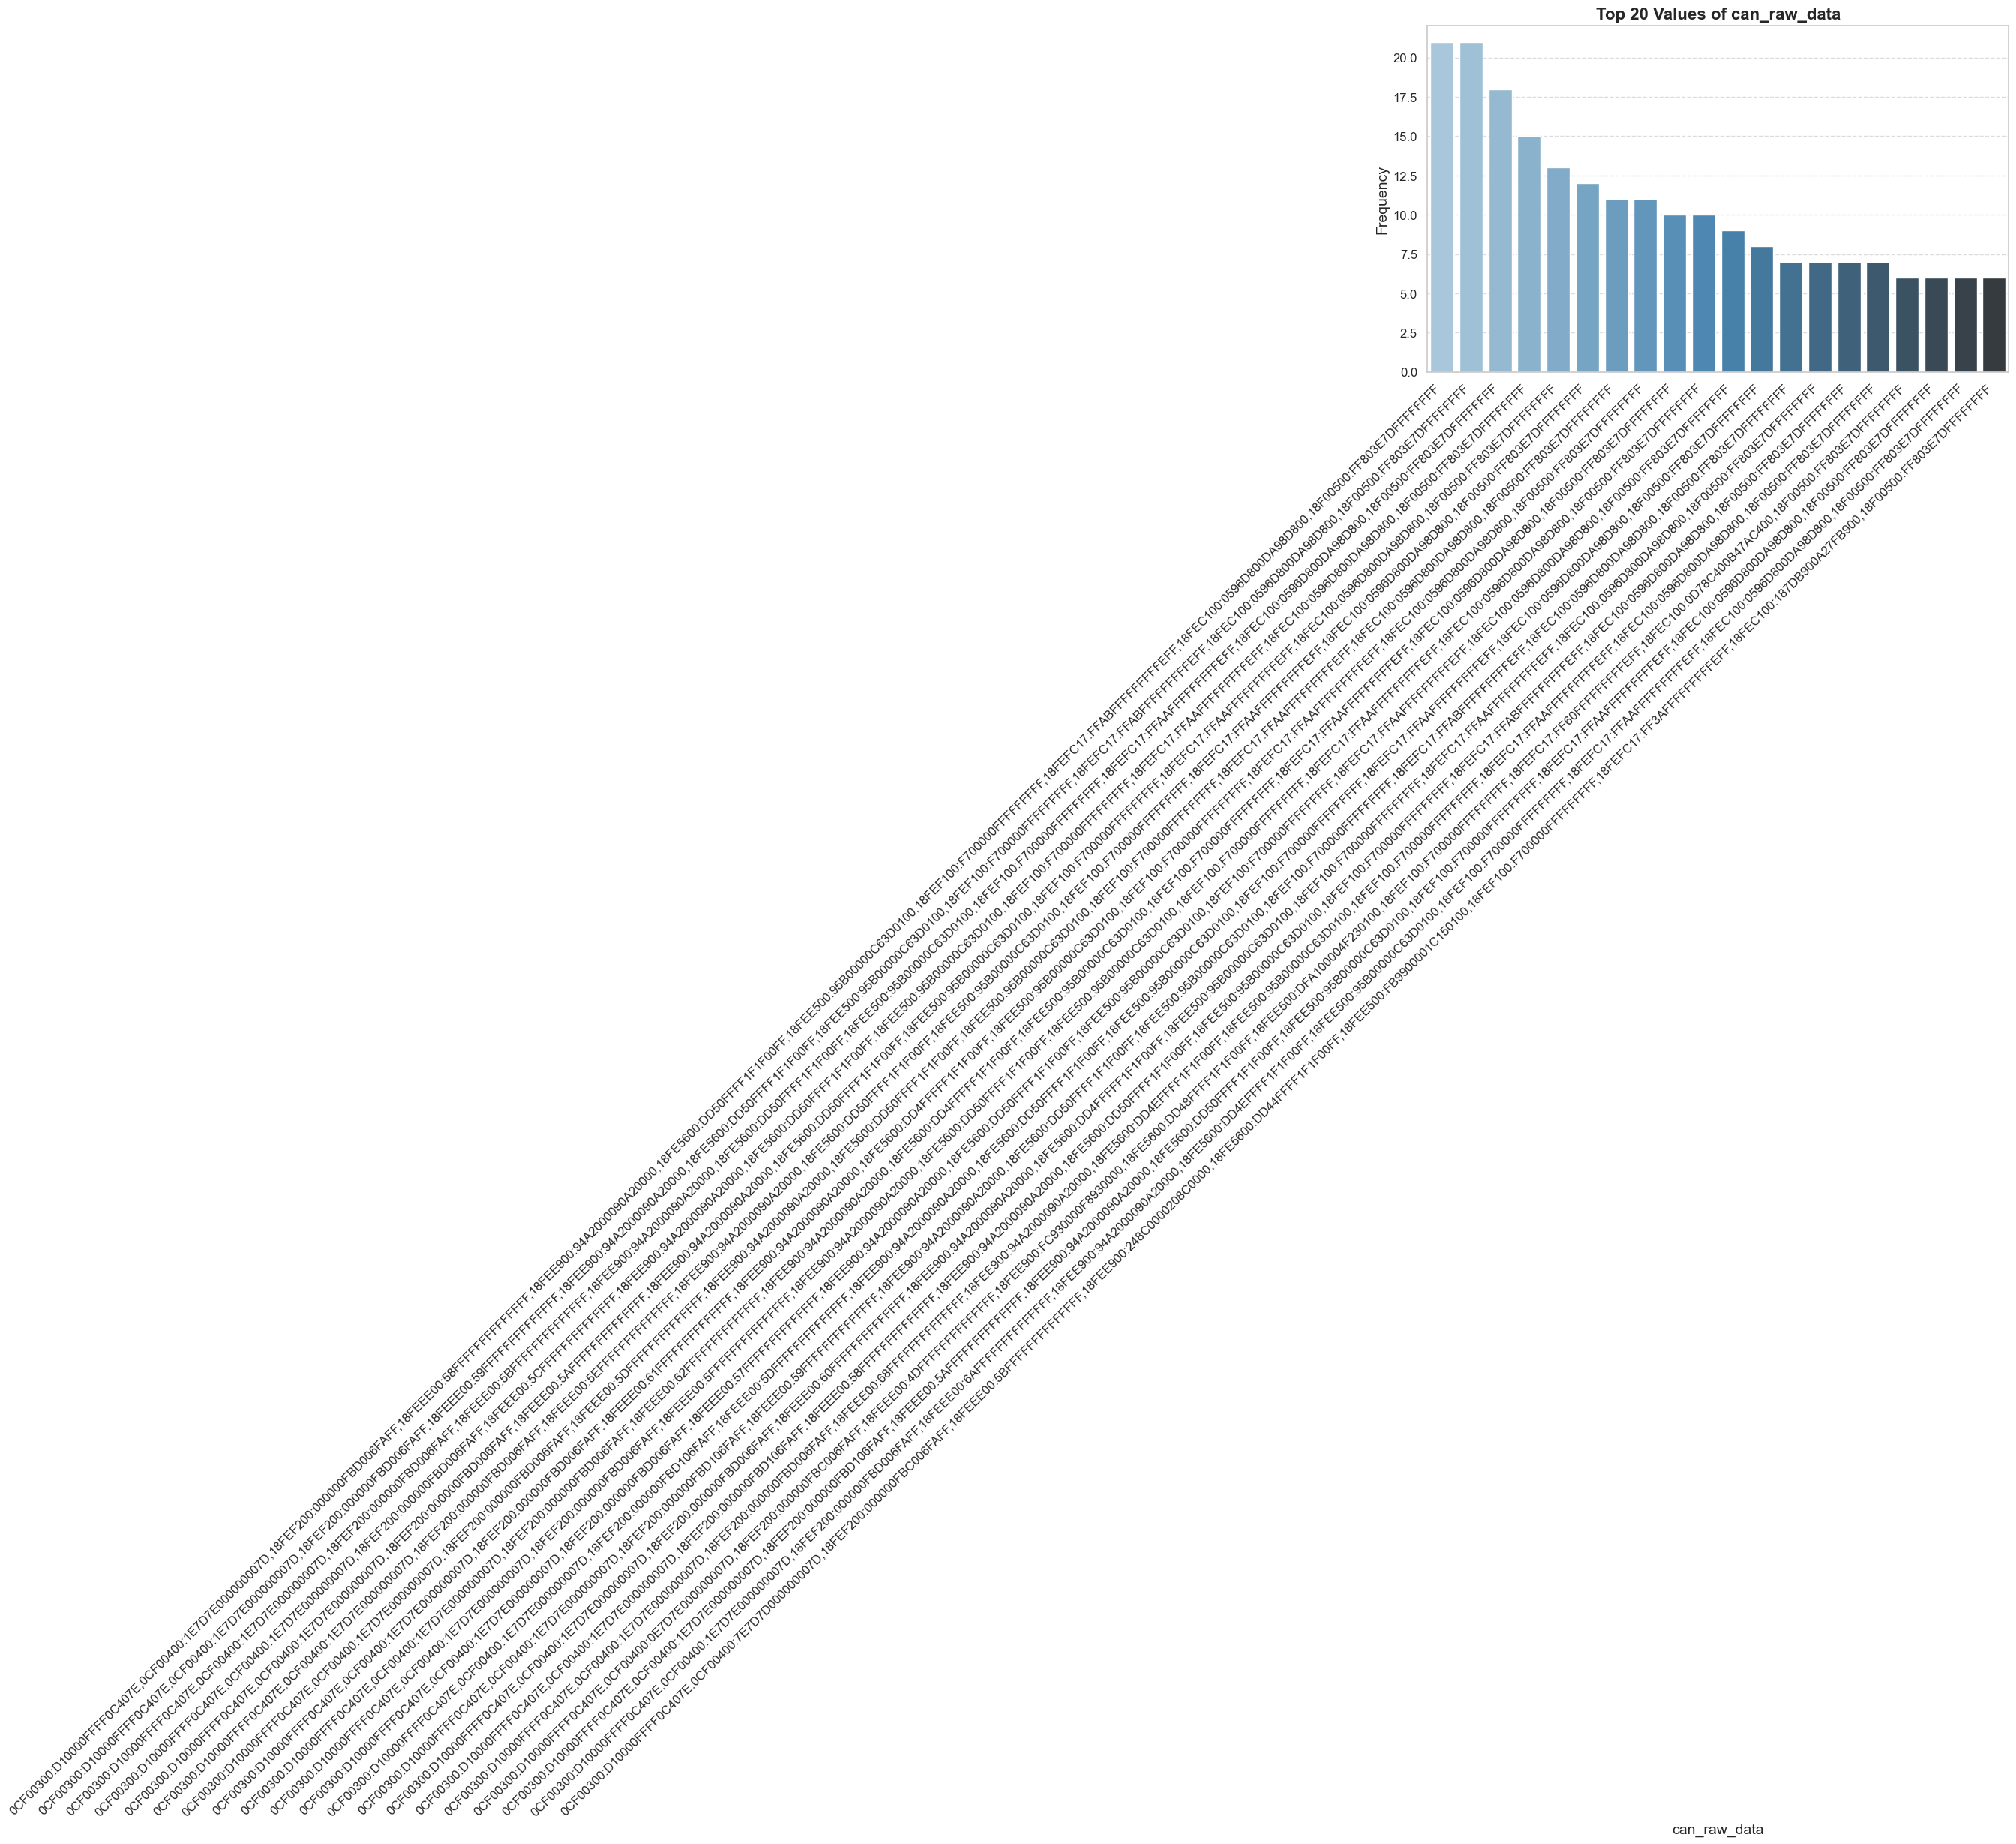

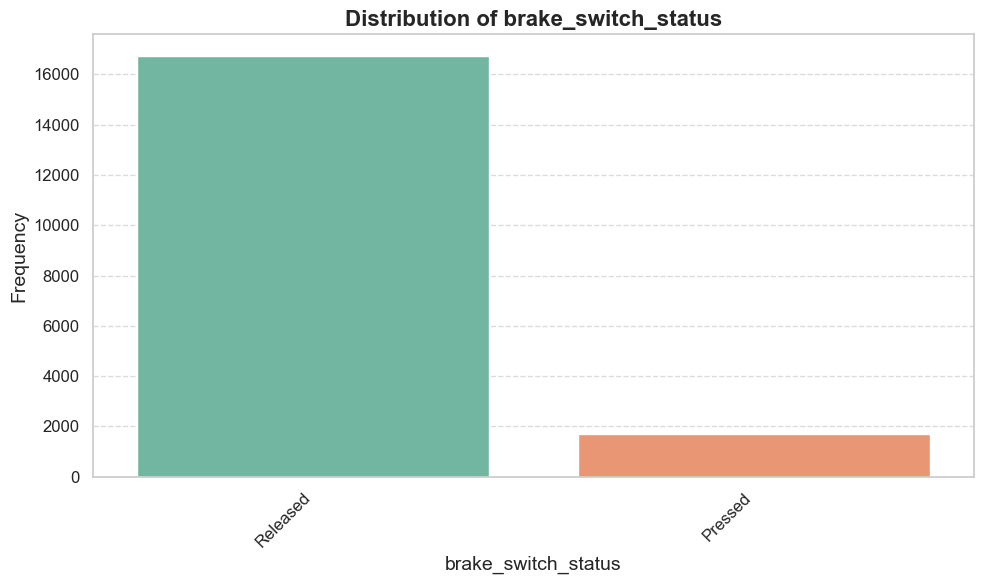

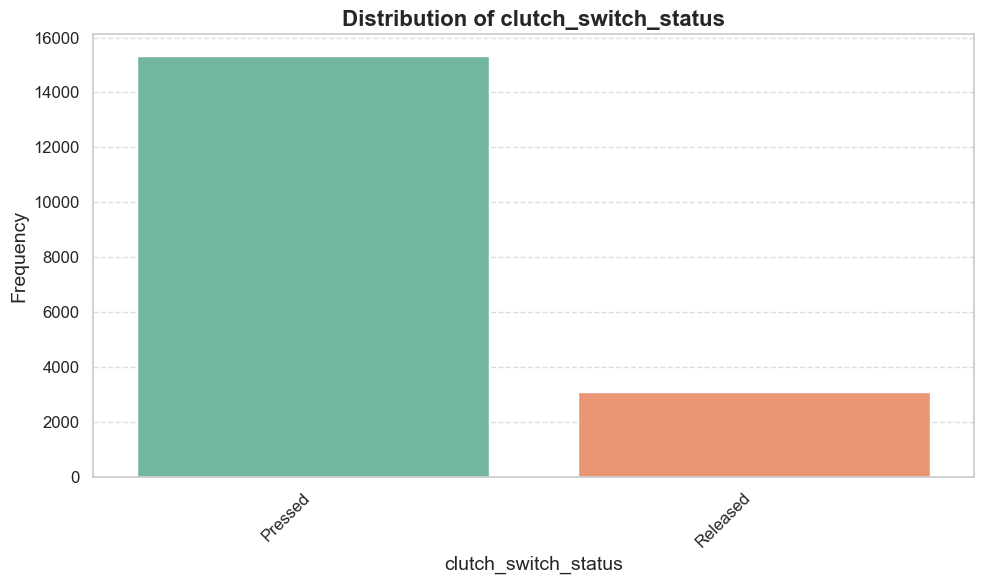

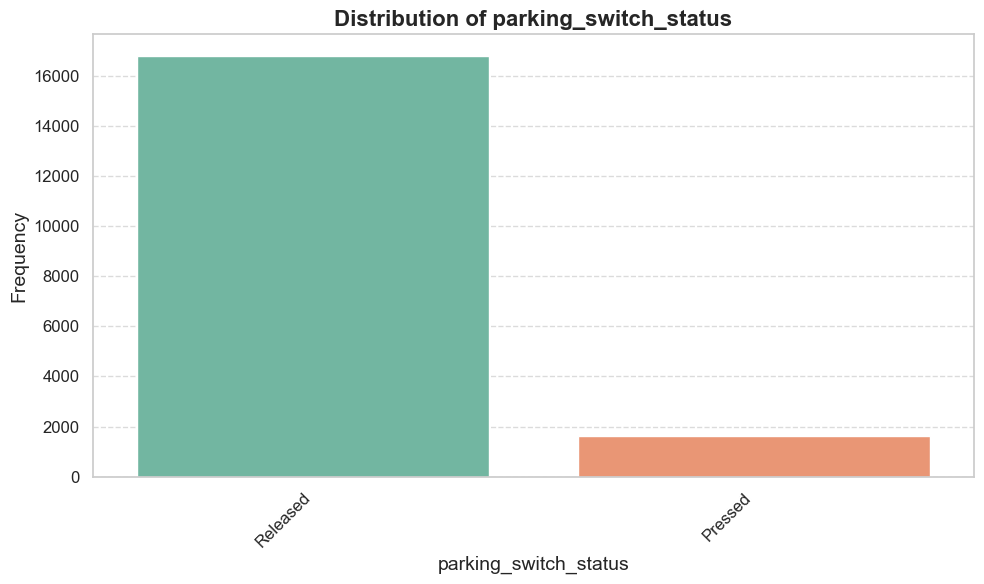

In [25]:
# Plot distributions for categorical features

# Set a seaborn style for better aesthetics
sns.set(style="whitegrid", palette="muted")

columns_to_visualize = ['pluscode', 'can_raw_data', 'brake_switch_status','clutch_switch_status', 'parking_switch_status']

# Loop over each column
for col in columns_to_visualize:
    plt.figure(figsize=(10, 6))  # Set figure size for each plot

    if df[col].nunique() > 20:  # High-cardinality columns
        print(f"{col} has too many unique values ({df[col].nunique()}). Showing top 20.")
        
        # Get the top 20 most frequent values
        top_values = df[col].value_counts().nlargest(20)
        
        # Create a bar plot with improved aesthetics
        sns.barplot(x=top_values.index, y=top_values.values, palette="Blues_d")
        plt.title(f"Top 20 Values of {col}", fontsize=16, weight='bold')
        plt.xlabel(col, fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    else:  # Low-cardinality columns
        sns.countplot(x=df[col], palette="Set2", order=df[col].value_counts().index)
        plt.title(f"Distribution of {col}", fontsize=16, weight='bold')
        plt.xlabel(col, fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()


### Step 11: Bivariate Analysis

In [26]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

In [27]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_cols.corr()

In [28]:
correlation_matrix

,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,runtime,engine_torque_percent,...,fuel_economy,accelerator_pedal_pos,vibration_status,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,adblue_level
lat,1.000000,0.935495,-0.032206,-0.006842,NaN,-0.026450,-0.014414,0.013316,0.012474,-0.034860,...,-0.002174,-0.040771,NaN,-0.010638,NaN,NaN,-0.040616,-0.050951,NaN,0.045261
lng,0.935495,1.000000,-0.021802,0.011704,NaN,-0.008306,-0.009798,0.006634,0.006540,-0.024068,...,-0.003275,-0.029712,NaN,-0.006687,NaN,NaN,-0.030611,-0.043994,NaN,-0.012995
engineload,-0.032206,-0.021802,1.000000,0.301353,NaN,0.180594,0.482889,-0.058534,-0.058783,0.982212,...,-0.623559,0.902727,NaN,0.018063,NaN,NaN,0.897413,0.291625,NaN,-0.037950
coolant,-0.006842,0.011704,0.301353,1.000000,NaN,0.412702,0.435605,-0.025954,-0.027049,0.303200,...,-0.211355,0.326964,NaN,0.006456,NaN,NaN,0.323835,-0.042404,NaN,-0.041782
engineoiltemp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehiclespeed,-0.026450,-0.008306,0.180594,0.412702,NaN,1.000000,0.559204,-0.096542,-0.097151,0.196502,...,-0.150622,0.236347,NaN,-0.053356,NaN,NaN,0.231210,-0.145131,NaN,-0.016233
rpm,-0.014414,-0.009798,0.482889,0.435605,NaN,0.559204,1.000000,-0.056769,-0.057713,0.504514,...,-0.411809,0.560249,NaN,-0.097221,NaN,NaN,0.545234,-0.076857,NaN,-0.058640
obddistance,0.013316,0.006634,-0.058534,-0.025954,NaN,-0.096542,-0.056769,1.000000,0.999554,-0.054390,...,0.125380,-0.039061,NaN,0.037389,NaN,NaN,-0.028897,0.061372,NaN,-0.193380
runtime,0.012474,0.006540,-0.058783,-0.027049,NaN,-0.097151,-0.057713,0.999554,1.000000,-0.054605,...,0.126095,-0.039411,NaN,0.037589,NaN,NaN,-0.029272,0.061854,NaN,-0.192928
engine_torque_percent,-0.034860,-0.024068,0.982212,0.303200,NaN,0.196502,0.504514,-0.054390,-0.054605,1.000000,...,-0.609425,0.910516,NaN,0.015294,NaN,NaN,0.923056,0.326191,NaN,-0.041966


#### Correlation matrix is a table showing the correlation coefficients between variables. Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no correlation.

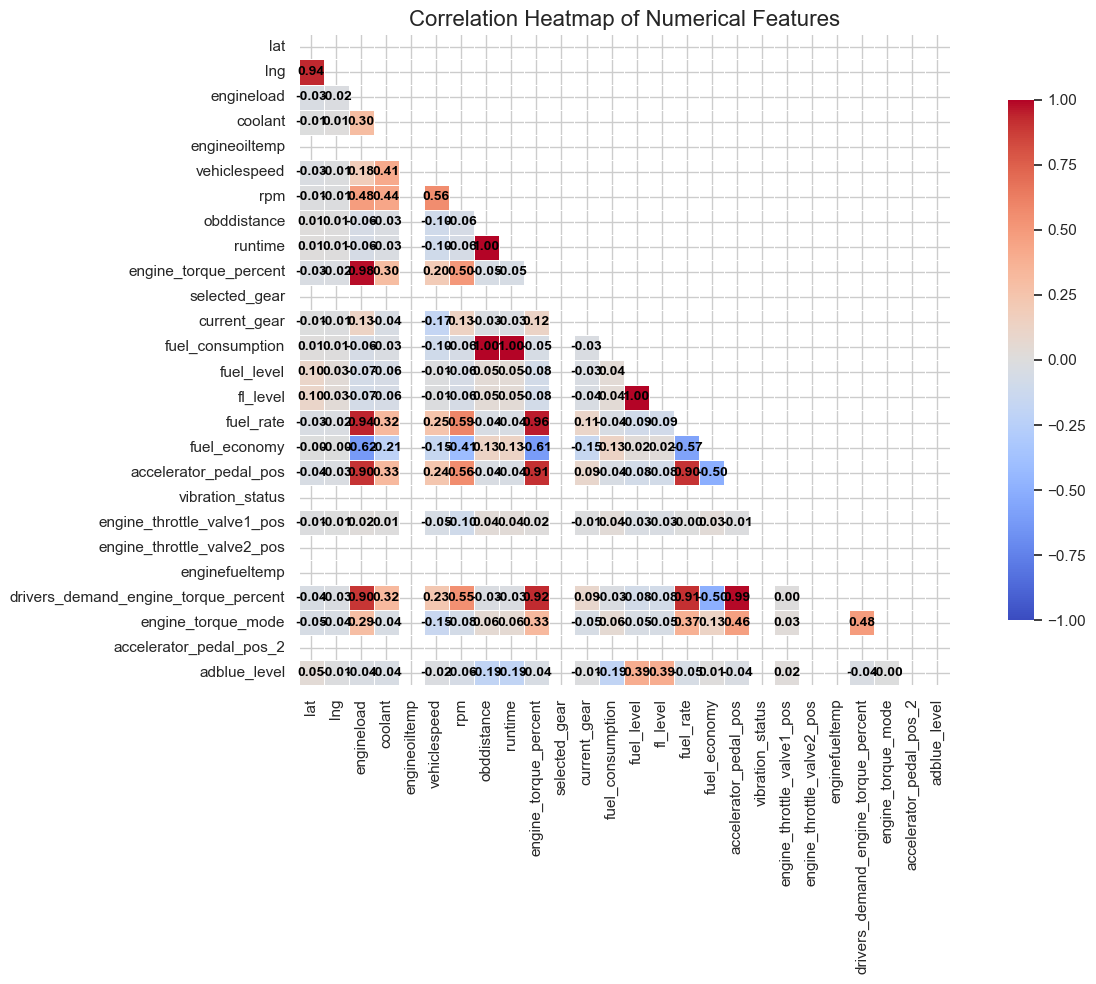

In [29]:
# Mask the upper triangle of the heatmap (since it's symmetric)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the plot size
plt.figure(figsize=(14, 10))

# Plot the heatmap with enhanced aesthetics
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm",  # Apply color palette
            linewidths=0.5, 
            mask=mask,   # Mask upper triangle
            cbar_kws={"shrink": .8},  # Adjust color bar size
            annot_kws={"size": 10, "weight": "bold", "color": "black"},  # Customize annotation text
            square=True,  # Make the plot square
            vmin=-1, vmax=1)  # Set the limits for color scale

# Set title and improve layout
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

Correlation Analysis:
1. Engine Load & Engine Torque Percent (0.98): Strong positive correlation, suggesting that as engine load increases, engine torque also increases.
2. Fuel Consumption & OBD Distance (0.999): This near-perfect correlation suggests that fuel consumption is closely tied to the distance traveled as captured by the OBD system.
3. RPM & Engine Torque Percent (0.91): RPM and engine torque percent are highly correlated, indicating that higher RPM values are associated with higher engine torque.
4. Fuel Rate & Fuel Economy (0.91): The high correlation between fuel rate and fuel economy suggests that as the fuel consumption rate increases, fuel economy tends to improve or remain consistent.
5. Fuel Economy & Engine Load (-0.63): Fuel economy tends to decrease with higher engine loads, which is expected as higher load results in more fuel consumption. 

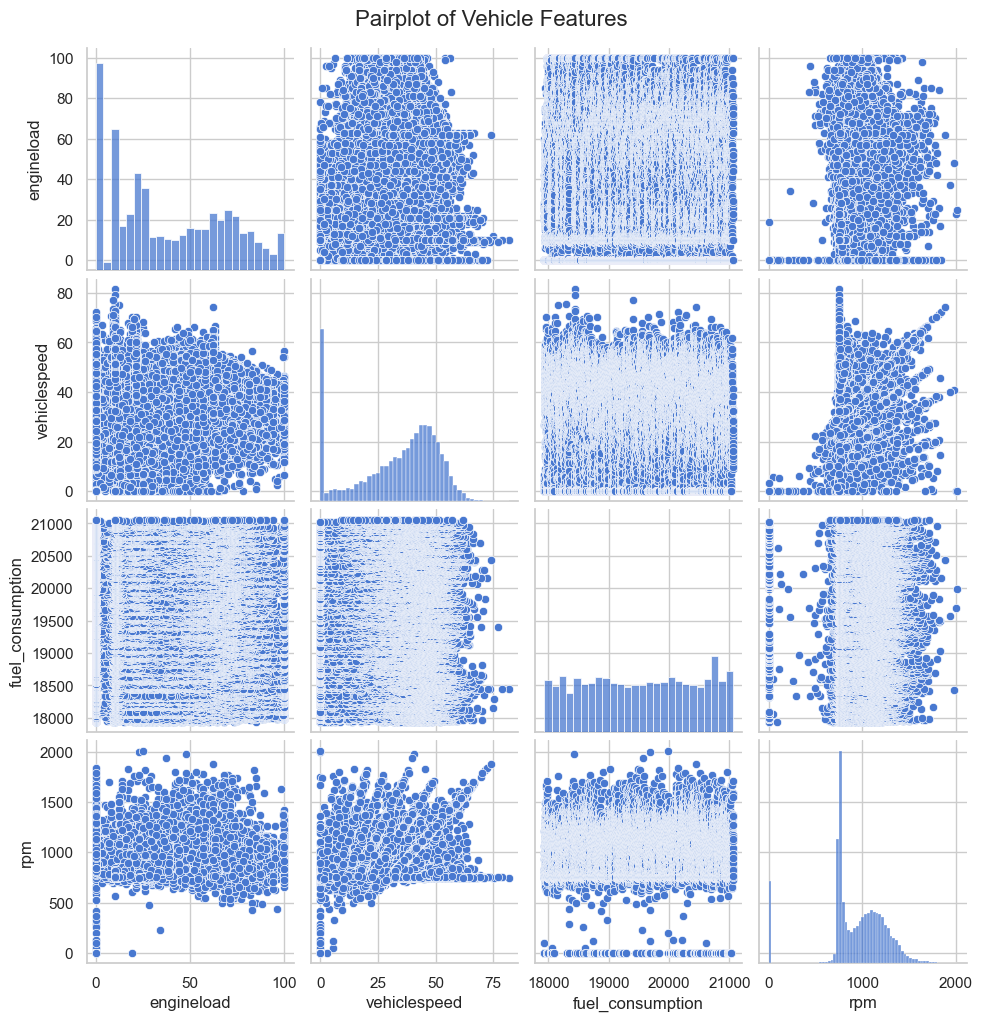

In [30]:
# Pairplot for a subset of features
sns.pairplot(df[['engineload', 'vehiclespeed', 'fuel_consumption', 'rpm']])
# Add a title
plt.suptitle("Pairplot of Vehicle Features", fontsize=16, y=1.02)
plt.show()

Variables like rpm and engineload could have a potential correlation, useful for further investigation. fuel_consumption seems constant and may require closer inspection for patterns There doesn't seem to be a strong linear relationship between vehiclespeed and other variables.

### Step 12: Visualize Outliers

In [31]:
outlier_columns = ['lat', 'lng', 'coolant', 'rpm', 'current_gear', 'fuel_economy', 'engine_throttle_valve1_pos', 'adblue_level']

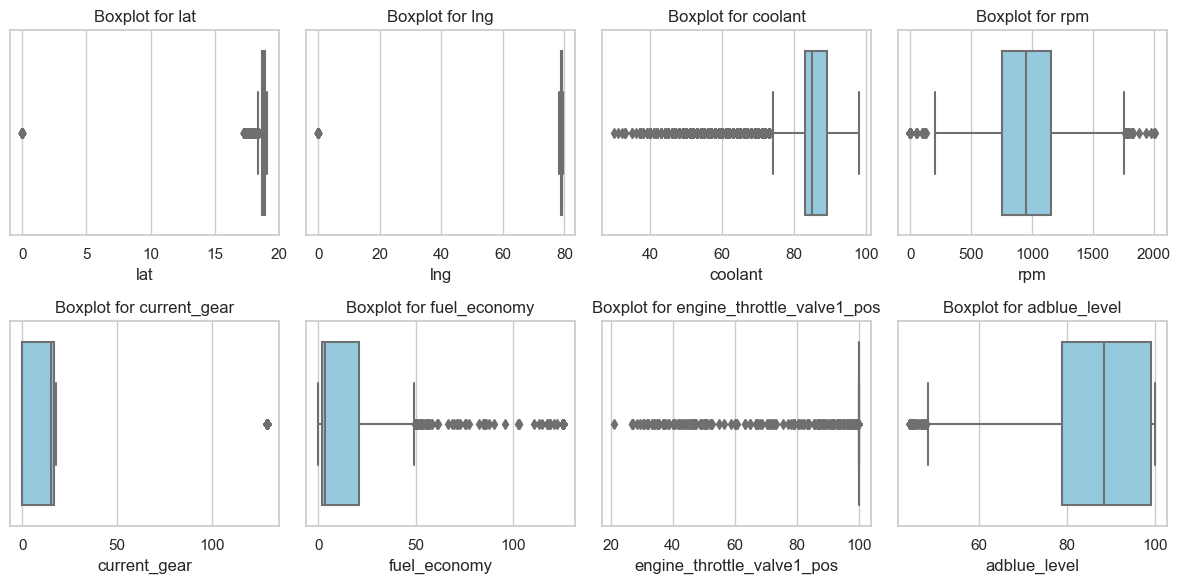

In [32]:
plt.figure(figsize=(12, 6))
for idx, col in enumerate(outlier_columns):
    plt.subplot(2, 4, idx+1)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

Box plot useful for visualizing the summary statistics (like median, quartiles) and identifying outliers in the data Components

### Feature Engineering

### Step 13: Create new features

In [33]:
# Feature 'speed_per_fuel' indicating efficiency
df['speed_per_fuel'] = df['vehiclespeed'] / (df['fuel_rate'] + 1)  # Avoid division by zero

#### 
This feature represents the efficiency of the vehicle. It helps in understanding how effectively the vehicle uses fuel to travel at a certain speed, which can be useful for fuel economy analysis.

In [34]:
# Set 'ts' as index
df.set_index('ts', inplace=True)

# Time-based features (hour, day of week)
df['hour'] = df.index.hour #This extracts the hour from the ts index (which is now a datetime object) and creates a new column 'hour' in the DataFrame.
df['day_of_week'] = df.index.dayofweek

In [6]:
print(df[['hour', 'day_of_week']].head())

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (4192250930.py, line 1)

In [10]:
unique_value=df['hour'].unique()

KeyError: 'hour'

In [ ]:
print(unique_value)

####
'hour': The time-based feature helps capture the time of day the data was recorded. It can reveal patterns related to vehicle performance or behavior based on different times of day, such as peak traffic hours or driving habits at different times.

'day_of_week': This feature helps capture weekly patterns in vehicle behavior. By identifying whether certain days of the week influence vehicle metrics (e.g., fuel consumption, speed), it can provide insights into weekly driving habits or seasonal trends.

In [36]:
# Engine temperature difference
df['engine_temp_difference'] = df['engineoiltemp'] - df['coolant']

####
'engine_temp_difference': This feature calculates the difference between engine oil temperature and coolant temperature. A high difference may indicate potential issues in engine cooling or inefficiency, providing insights into engine health or the need for maintenance.

### Step 14: Standardize or normalize features

In [37]:
numerical_cols = numerical_cols.columns.tolist()

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])

df_scaled_df = pd.DataFrame(df_scaled, columns=numerical_cols)
print(df_scaled_df.head())

        lat       lng  engineload   coolant  engineoiltemp  vehiclespeed  \
0  0.422815 -0.159044   -0.339301 -6.681837   4.547474e-13     -1.860761   
1  0.422824 -0.159046   -0.540047 -5.645318   4.547474e-13     -1.860761   
2  0.422906 -0.159034   -0.439674 -4.738363   4.547474e-13     -1.782327   
3  0.422715 -0.159020   -0.105097 -4.220103   4.547474e-13     -1.703893   
4  0.422514 -0.158984   -1.276114 -3.572279   4.547474e-13     -1.608030   

        rpm  obddistance   runtime  engine_torque_percent  ...  fuel_economy  \
0 -0.575067    -1.756611 -1.748194              -0.312639  ...     -0.577647   
1  0.829771    -1.756611 -1.748194              -0.445799  ...     -0.577647   
2 -0.563981    -1.756611 -1.748194              -0.445799  ...     -0.569849   
3  0.181443    -1.756605 -1.747653              -0.046320  ...     -0.574852   
4  0.393602    -1.756599 -1.747653              -1.200371  ...      2.318700   

   accelerator_pedal_pos  vibration_status  engine_throttle_va

### Techniques for deeper insights


####  Isolation Forest to detect anomalies in the dataset, with a contamination level of 1%. It visualizes anomalies in the fuel_rate feature, where anomalies are marked in red, helping identify unusual patterns or outliers in the data.

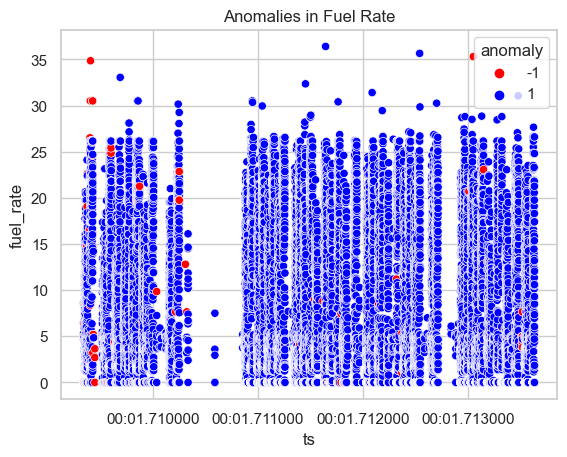

In [39]:
from sklearn.ensemble import IsolationForest

# Use IsolationForest for anomaly detection
iso_forest = IsolationForest(contamination=0.01)
df['anomaly'] = iso_forest.fit_predict(df[numerical_cols])

# Visualize anomalies in 'fuel_rate'
sns.scatterplot(x=df.index, y=df['fuel_rate'], hue=df['anomaly'], palette={-1: 'red', 1: 'blue'})
plt.title('Anomalies in Fuel Rate')
plt.show()

contamination=0.01: This parameter defines the expected proportion of outliers (anomalies) in the data. In this case, it's set to 1% of the data points (0.01).

### KMeans clustering is used to group data points into clusters based on their similarity across multiple features. KMeans helps uncover hidden patterns or groupings within the data that may not be immediately obvious.

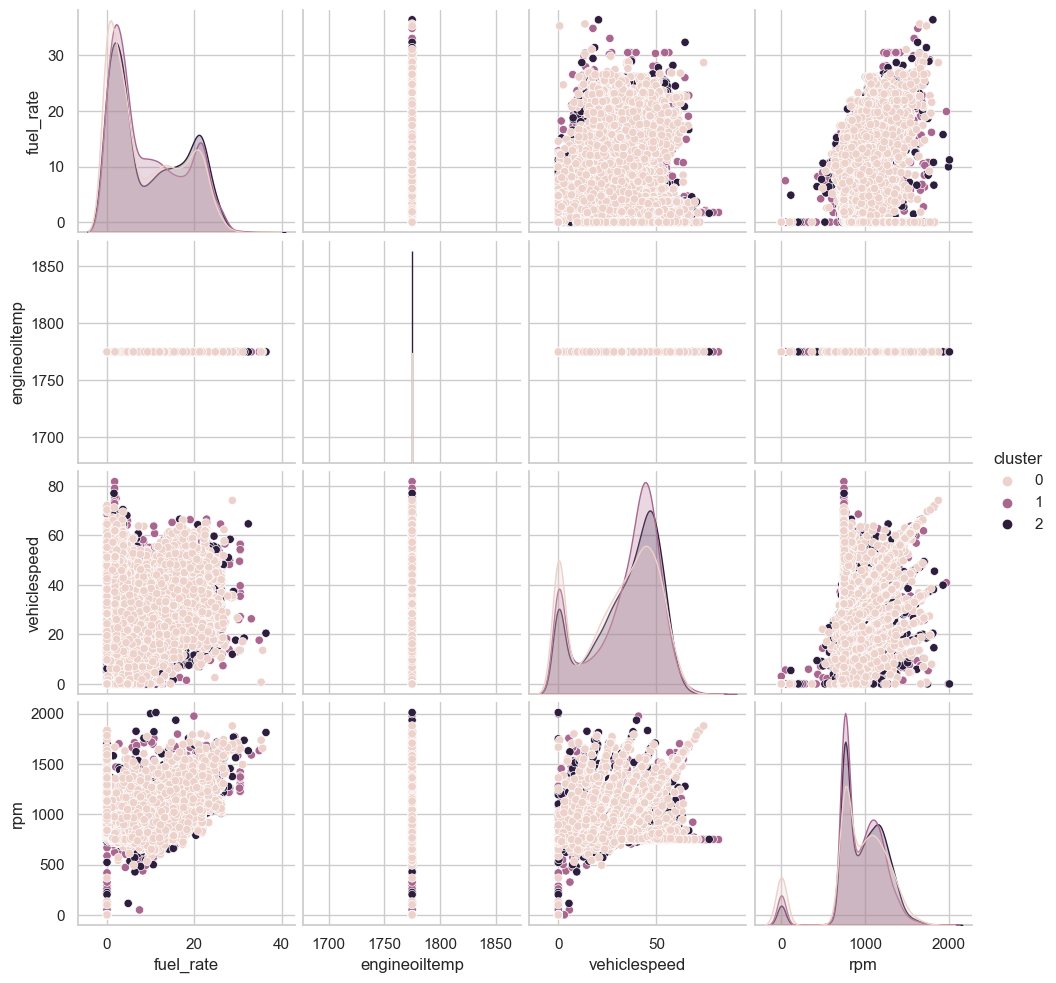

In [40]:
from sklearn.cluster import KMeans

# Perform KMeans clustering on numerical data
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[numerical_cols])

# Visualize the clusters
sns.pairplot(df[['fuel_rate', 'engineoiltemp', 'vehiclespeed', 'rpm', 'cluster']], hue='cluster')
plt.show()

Cluster 0:

Fuel Rate: Lower values, Vehicle Speed: Closer to idle or very low speed, RPM: Lower, indicating less engine activity.

Represents idle/low-activity states, such as when the engine is on but the vehicle is stationary (e.g., in traffic or parked)

Cluster 1:

Fuel Rate: Higher compared to other clusters,Vehicle Speed: medium-speed driving conditions,RPM: Higher than idle but not at maximum values.

Indicates regular driving conditions, such as moderate speed and acceleration. The engine is actively consuming fuel and performing work.

Cluster 2:

Fuel Rate: Very high (higher fuel consumption),Vehicle Speed: High values or rapid acceleration,RPM: High values, suggest more engine revolutions per minute

Represents high-performance conditions, such as rapid acceleration, high-speed driving

### Recommendations and Insights

1. Geographical Data ('lat', 'lng'): Outliers in latitude and longitude may indicate faulty GPS data or vehicles operating in unexpected regions. It could also indicate vehicles operating in areas that represent extended coverage or new coverage.

2. Engine Parameters ('coolant', 'rpm', 'engine_throttle_valve1_pos'): Outliers in coolant temperature may signify cooling system issues or incorrect sensor readings. Extreme RPM or throttle valve positions can indicate aggressive driving patterns or potential engine wear.

3. Fuel Efficiency ('fuel_economy'): Outliers here point to potential inefficiencies, possibly due to engine issues, improper driving habits, or incorrect calibration.


Recommendations
1. Maintenance Optimization: Anomaly detection can identify vehicles with irregular fuel consumption or engine performance, allowing for maintenance scheduling and preventing costly repairs.
2. Investigating the root cause of these outliers. This may indicate system inefficiencies or maintenance issues.
3. Geographical Insights: Areas which has higher fuel consumption might require more maintenance efforts or better route optimization.
4. Predictive Maintenance with ML: Machine learning models help in forecasting vehicle performance trends and predict maintenance needs, enabling data-driven decisions that will prevent unexpected breakdowns and improve fleet operations.
5. Real time perfomance monitoring: Dashboard or alert system should be in place to flag vehicles that deviate significantly, which will allow for real-time troubleshooting.

Correlation Analysis:
1. Engine Load & Engine Torque Percent (0.98): Strong positive correlation, suggesting that as engine load increases, engine torque also increases.
2. Fuel Consumption & OBD Distance (0.999): This near-perfect correlation suggests that fuel consumption is closely tied to the distance traveled as captured by the OBD system.
3. RPM & Engine Torque Percent (0.91): RPM and engine torque percent are highly correlated, indicating that higher RPM values are associated with higher engine torque.
4. Fuel Rate & Fuel Economy (0.91): The high correlation between fuel rate and fuel economy suggests that as the fuel consumption rate increases, fuel economy tends to improve or remain consistent.
5. Fuel Economy & Engine Load (-0.63): Fuel economy tends to decrease with higher engine loads, which is expected as higher load results in more fuel consumption. 